# Collecting data

In [ ]:
import cv2

def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        if len(faces) == 0:
            return None

        for (x, y, h, w) in faces:
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face

    cap = cv2.VideoCapture(0)
    img_id = 0

    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id += 1
            face = cv2.resize(face_cropped(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "data/soujanya." + str(img_id) + ".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1) == 13 or int(img_id) == 1000:
                break

    cap.release()
    cv2.destroyAllWindows()
    print("Done")

generate_dataset()


# Creating lable

In [1]:
import numpy as np
def my_lable(image_name):
    name = image_name.split('.')[-3]
    if name == "Paramesh G":
        return np.array([1,0])
    elif name == "Naveen Kumar":
        return np.array([0,1])
    

# Create data

In [2]:
import os
from random import shuffle
from tqdm import tqdm

In [6]:
def my_data():
    data=[]
    for img in tqdm(os.listdir("dataset1")):
        path=os.path.join("dataset1",img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data),my_lable(img)])
    shuffle(data)
    return data

In [7]:
data = my_data()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset1'

In [33]:
train = data[:1600]  # 80%
test = data[1600:]
X_train = np.array([i[0] for i in train]).reshape(-1, 50, 50, 1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, 50, 50, 1)
print(X_test.shape)
y_test = [i[1] for i in test]


(1600, 50, 50, 1)
(400, 50, 50, 1)


# Creating Model

In [34]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [46]:
import tensorflow.compat.v1 as tf
tf.reset_default_graph()

In [47]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, fully_connected, dropout
from tflearn.layers.estimator import regression
import numpy as np


convnet = input_data(shape=[50, 50, 1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')  # Change to 2 units and use softmax activation
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')



In [48]:
# Create the model
model = tflearn.DNN(convnet, tensorboard_verbose=1)

# Train the model
model.fit(X_train, y_train, n_epoch=12, validation_set=(X_test, y_test), show_metric=True, run_id="FRS")


Training Step: 299  | total loss: 0.00040 | time: 2.235s
| Adam | epoch: 012 | loss: 0.00040 - acc: 1.0000 -- iter: 1536/1600
Training Step: 300  | total loss: 0.00037 | time: 3.351s
| Adam | epoch: 012 | loss: 0.00037 - acc: 1.0000 | val_loss: 0.00005 - val_acc: 1.0000 -- iter: 1600/1600
--


# Let's visualize the data and make prediction

In [59]:
import cv2

def generate_dataset():
    face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

    def face_cropped(img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        if len(faces) == 0:
            return None

        for (x, y, h, w) in faces:
            cropped_face = img[y:y+h, x:x+w]
        return cropped_face

    cap = cv2.VideoCapture(0)
    img_id = 21

    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id += 1
            face = cv2.resize(face_cropped(frame), (200, 200))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "Images for visualization"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1) == 13 or int(img_id) == 40:
                break

    cap.release()
    cv2.destroyAllWindows()
    print("Done")

generate_dataset()


Done


In [64]:
def data_for_visualization():
    Vdata = []
    for img in tqdm(os.listdir("Images for visualization")):
        path = os.path.join("Images for visualization", img)
        img_num = img.split('.')[0]
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data),img_num])
    shuffle(Vdata)
    return Vdata

In [65]:
Vdata = data_for_visualization()

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 143.46it/s]


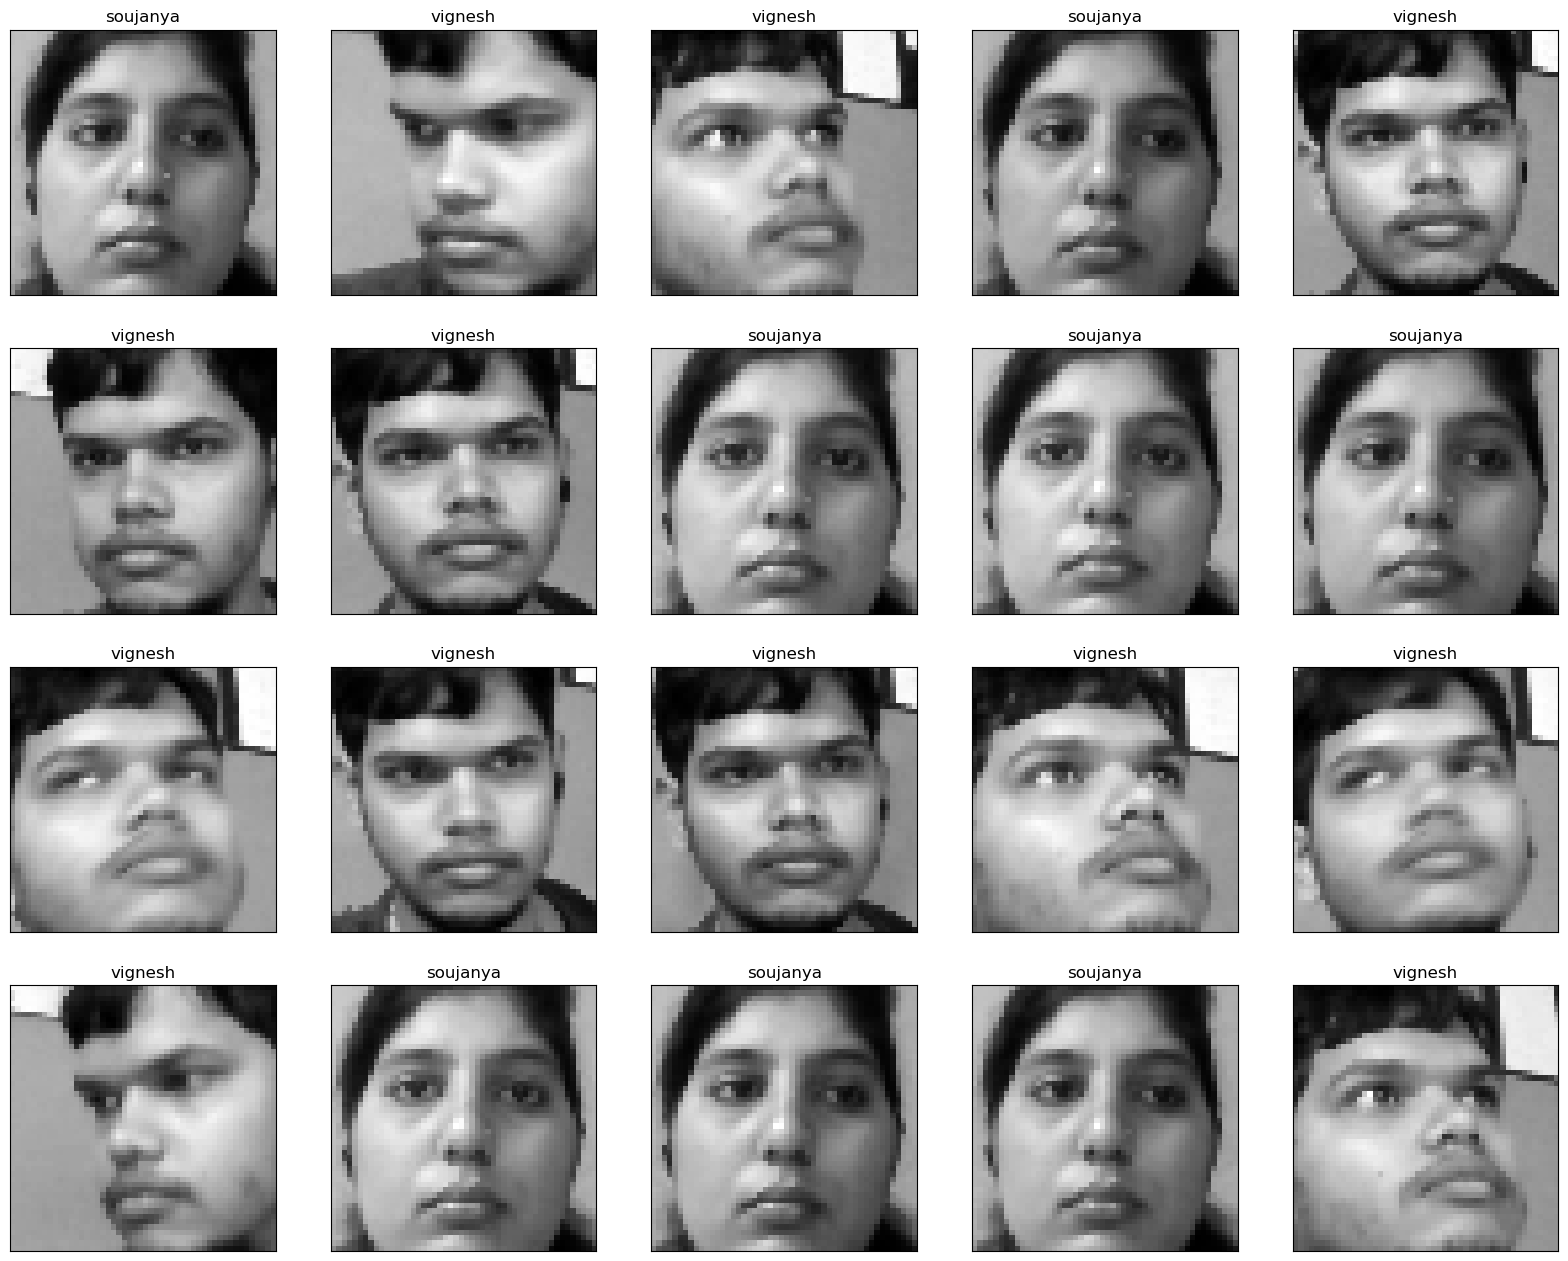

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out)==0:
        my_lable = 'vignesh'
    else :
        my_lable = 'soujanya'
        
    y.imshow(image, cmap='gray')
    plt.title(my_lable)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()    